In [ ]:
# !pip install pycocotools
# !pip install pycocotools-windows


ERROR: Could not find a version that satisfies the requirement pycocotools-windows (from versions: none)
ERROR: No matching distribution found for pycocotools-windows


In [14]:
import pandas as pd

In [26]:
### Reading COCO JSON Files

import json
from pycocotools.coco import COCO

# Define the paths
# change 'train' or 'valid' or 'test' to the corresponding folder
coco_json_path = "./Climbing Holds and Volumes.v14i.coco/test/_annotations.coco.json"
images_dir = "./Climbing Holds and Volumes.v14i.coco/test/"

# Load the COCO annotations
coco = COCO(coco_json_path)

# Get all image IDs
image_ids = coco.getImgIds()

# Get metadata for a specific image (e.g., the first one)
image_metadata = coco.loadImgs(image_ids[0])[0]
print("Image Metadata:", image_metadata)

# Get the file path for the image
image_path = f"{images_dir}/{image_metadata['file_name']}"
print("Image Path:", image_path)

# Get all annotation IDs for the image
annotation_ids = coco.getAnnIds(imgIds=image_metadata['id'])
annotations = coco.loadAnns(annotation_ids)
print("Annotations for the Image:", annotations)

# Get category details
categories = coco.loadCats([ann['category_id'] for ann in annotations])
print("Categories:", categories)


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Image Metadata: {'id': 0, 'license': 1, 'file_name': '6EgpmqjXq8ePyqd2N_jpg.rf.260d1ee5b3b1250563bbfdc003ad7e64.jpg', 'height': 1067, 'width': 800, 'date_captured': '2023-10-13T13:22:07+00:00'}
Image Path: ./Climbing Holds and Volumes.v14i.coco/test//6EgpmqjXq8ePyqd2N_jpg.rf.260d1ee5b3b1250563bbfdc003ad7e64.jpg
Annotations for the Image: [{'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [404, 291, 111, 90], 'area': 9990, 'segmentation': [], 'iscrowd': 0}, {'id': 1, 'image_id': 0, 'category_id': 1, 'bbox': [89, 402, 88, 108], 'area': 9504, 'segmentation': [], 'iscrowd': 0}, {'id': 2, 'image_id': 0, 'category_id': 1, 'bbox': [435, 966, 68, 69], 'area': 4692, 'segmentation': [], 'iscrowd': 0}, {'id': 3, 'image_id': 0, 'category_id': 1, 'bbox': [268, 107, 64, 79], 'area': 5056, 'segmentation': [], 'iscrowd': 0}, {'id': 4, 'image_id': 0, 'category_id': 2, 'bbox': [295, 387, 97, 78], 'area': 7566, 'segmentat

In [27]:
### Looping Through Images and Annotations

for image_id in image_ids:
    # Load image metadata
    image_metadata = coco.loadImgs(image_id)[0]
    image_path = f"{images_dir}/{image_metadata['file_name']}"

    print(f"Processing image: {image_path}")

    # Load annotations for this image
    annotation_ids = coco.getAnnIds(imgIds=image_metadata['id'])
    annotations = coco.loadAnns(annotation_ids)

    for annotation in annotations:
        bbox = annotation['bbox']  # Bounding box [x, y, width, height]
        category_id = annotation['category_id']
        category_name = coco.loadCats(category_id)[0]['name']

        print(f"Annotation: BBox={bbox}, Category={category_name}")


Processing image: ./Climbing Holds and Volumes.v14i.coco/test//6EgpmqjXq8ePyqd2N_jpg.rf.260d1ee5b3b1250563bbfdc003ad7e64.jpg
Annotation: BBox=[404, 291, 111, 90], Category=1
Annotation: BBox=[89, 402, 88, 108], Category=0
Annotation: BBox=[435, 966, 68, 69], Category=0
Annotation: BBox=[268, 107, 64, 79], Category=0
Annotation: BBox=[295, 387, 97, 78], Category=1
Annotation: BBox=[295, 722, 164, 147], Category=1
Annotation: BBox=[516, 353, 55, 41], Category=0
Annotation: BBox=[37, 820, 79, 71], Category=1
Annotation: BBox=[528, 170, 62, 61], Category=0
Annotation: BBox=[570, 45, 45, 43], Category=0
Annotation: BBox=[1, 951, 72, 84], Category=1
Annotation: BBox=[739, 385, 61, 71], Category=0
Annotation: BBox=[618, 268, 125.11, 98.64], Category=1
Annotation: BBox=[132, 546, 119, 55], Category=0
Annotation: BBox=[106, 287, 45, 35], Category=0
Annotation: BBox=[109, 252, 50, 39], Category=0
Annotation: BBox=[201, 252, 135, 67], Category=0
Annotation: BBox=[420, 0, 38, 23], Category=0
Annot

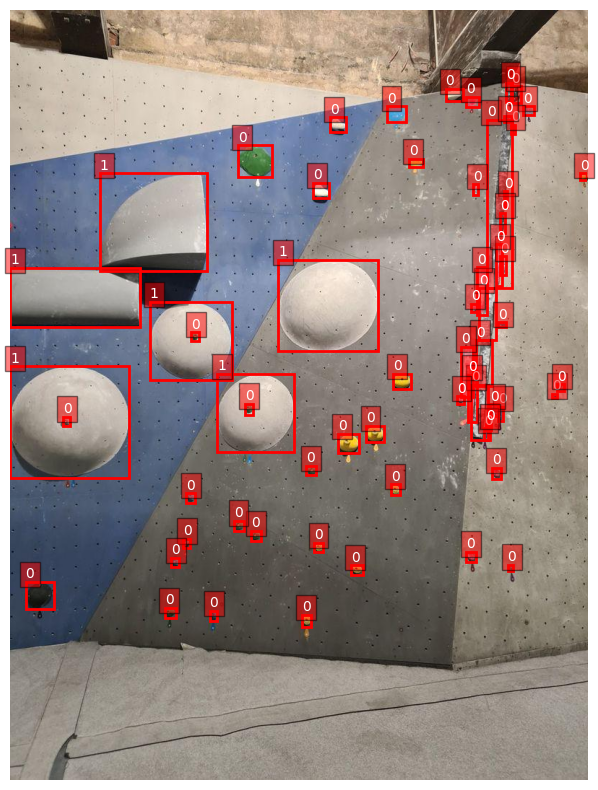

In [28]:
### Visualizing COCO Annotations

import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Load the image
image = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Create a plot
ax = plt.gca()

# Plot each annotation
for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']

    # Draw the bounding box
    rect = patches.Rectangle(
        (bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)

    # Add the label
    plt.text(
        bbox[0], bbox[1] - 5, category_name, color='white', fontsize=10, bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis('off')
plt.show()


In [29]:
### Filtering Images by Category

# Get category ID for a specific class (e.g., 'person')
category_ids = coco.getCatIds(catNms=['person'])

# Get all image IDs containing the category
image_ids_with_category = coco.getImgIds(catIds=category_ids)

print(f"Number of images with 'person': {len(image_ids_with_category)}")


Number of images with 'person': 148


In [30]:
### Saving Data to CSV

import csv

output_file = "coco_annotations.csv"

with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ImageID', 'FileName', 'Category', 'BBox'])

    for image_id in image_ids:
        # Load image metadata
        image_metadata = coco.loadImgs(image_id)[0]

        # Load annotations for this image
        annotation_ids = coco.getAnnIds(imgIds=image_metadata['id'])
        annotations = coco.loadAnns(annotation_ids)

        for annotation in annotations:
            bbox = annotation['bbox']
            category_id = annotation['category_id']
            category_name = coco.loadCats(category_id)[0]['name']

            writer.writerow([
                image_metadata['id'],
                image_metadata['file_name'],
                category_name,
                bbox
            ])

print(f"Annotations exported to {output_file}")


Annotations exported to coco_annotations.csv


In [ ]:
# verify the number of unique images in train
train = pd.read_csv('coco_annotations.csv')
train['FileName'].nunique()

148